### **直线检测（2）**

cv.HoughLinesP()返回值是线段两个点的坐标(x1, y1, x2, y2)，最后一个参数较大时，直线检测的完整性较高，但数量较少

In [20]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [19]:
cv.HoughLinesP?

Docstring:
HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]]) -> lines
.   @brief Finds line segments in a binary image using the probabilistic Hough transform.
.   
.   The function implements the probabilistic Hough transform algorithm for line detection, described
.   in @cite Matas00
.   
.   See the line detection example below:
.   @include snippets/imgproc_HoughLinesP.cpp
.   This is a sample picture the function parameters have been tuned for:
.   
.   ![image](pics/building.jpg)
.   
.   And this is the output of the above program in case of the probabilistic Hough transform:
.   
.   ![image](pics/houghp.png)
.   
.   @param image 8-bit, single-channel binary source image. The image may be modified by the function.
.   @param lines Output vector of lines. Each line is represented by a 4-element vector
.   \f$(x_1, y_1, x_2, y_2)\f$ , where \f$(x_1,y_1)\f$ and \f$(x_2, y_2)\f$ are the ending points of each detected
.   line segment.
.   @param rh

In [21]:
def draw_line(img, lines):
    img_copy = img.copy()
    for i in range(0, len(lines)):
        for x1, y1, x2, y2 in lines[i]:
            cv.line(img_copy, (x1, y1), (x2, y2), (255, 255, 255), 2)
    return img_copy

In [22]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'HoughLines.jpg')[:, :, [2, 1, 0]]
if img is None:
    print('Failed to read HoughLines.jpg')
    sys.exit

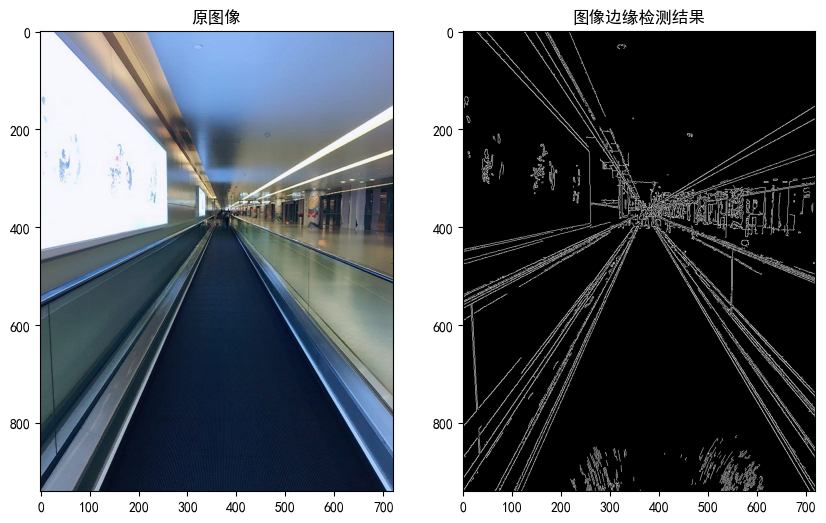

In [23]:
# 检测图像边缘
# cv.HoughLines()第一个参数必须是单通道二值图像，如果要检测彩色图像或灰度图像，可以将边缘检测后的图像作为输入
image_edge = cv.Canny(img, 80, 180, 3)
# 展示结果
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('原图像')
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title('图像边缘检测结果')
plt.imshow(image_edge, cmap='gray')

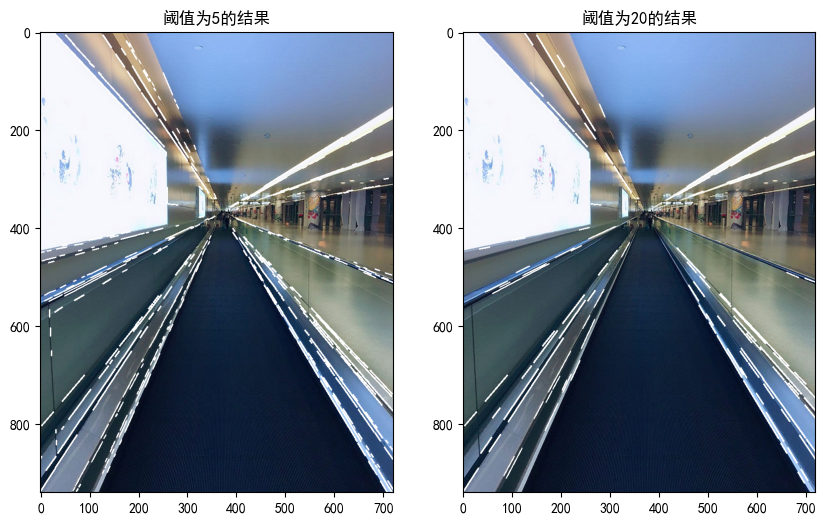

In [24]:
# 设置线段的最小长度
# 如果图像中线段的长度小于minLineLength，即使是直线也不会作为最终结果输出
min_line_length = 200
# 分别设定不同最大连接距离并进行直线检测
# 最大连接距离指相邻两个线段之间的最短距离，对于检测斜线需要设置较大
max_line_gap_1 = 5
# 累加器的阈值此处设置为150
lines_1 = cv.HoughLinesP(image_edge, 1, np.pi / 180, 150, min_line_length, max_line_gap_1)
try:
    img1 = draw_line(img, lines_1)
except:
    print('最大连接距离设为{}时，不能检测出直线'.format(max_line_gap_1))
max_line_gap_2 = 20
# 累加器的阈值此处设置为150
lines_2 = cv.HoughLinesP(image_edge, 1, np.pi / 180, 150, min_line_length, max_line_gap_2)
try:
    img2 = draw_line(img, lines_2)
except:
    print('最大连接距离设为{}时，不能检测出直线'.format(max_line_gap_2))
# 展示结果
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('阈值为{}的结果'.format(max_line_gap_1))
plt.imshow(img1)
plt.subplot(1, 2, 2)
plt.title('阈值为{}的结果'.format(max_line_gap_2))
plt.imshow(img2)